In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        
import torch
import torch.nn as nn       
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset     

In [3]:
df = pd.read_csv('D:\Dataset/IMDB Dataset.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22216\3026662235.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\Dataset/IMDB Dataset.csv')


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
df = df.drop_duplicates()

In [6]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,No one expects the Star Trek movies to be high...,positive
freq,1,24884


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


<function matplotlib.pyplot.show(close=None, block=None)>

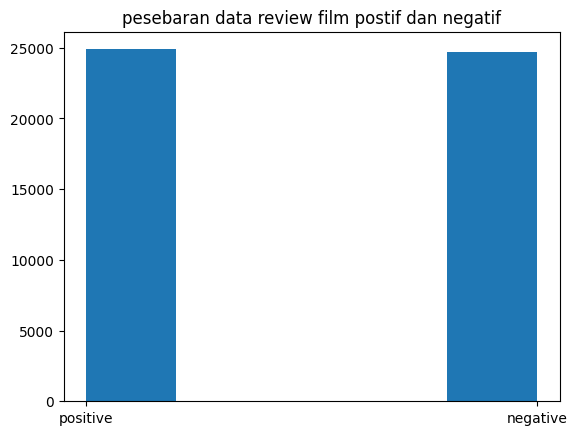

In [13]:
plt.hist(df['sentiment'], bins= 5)
plt.title('pesebaran data review film postif dan negatif')
plt.show

In [11]:
df['sentiment'] = df["sentiment"].map({'positive': 1, 'negative': 0})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22004\595121944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df["sentiment"].map({'positive': 1, 'negative': 0})


In [12]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [17]:
text = df['review'].values
labels = df['sentiment'].values
type(text)


numpy.ndarray

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 5000)
x = tfidf.fit_transform(text).toarray()
y = labels

In [20]:
print(x.shape)
print(y.shape)  
print(type(x))
print(type(y))

(49582, 5000)
(49582,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
split_ration = 0.8
split_index = int(split_ration * x.shape[0])

In [22]:
x_train, x_val = x[:split_index], x[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [23]:
print("x_train:\n", x_train.shape)
print("y_train:\n", y_train.shape)
print("x_val:\n", x_val.shape)
print("y_val:\n", y_val.shape)

x_train:
 (39665, 5000)
y_train:
 (39665,)
x_val:
 (9917, 5000)
y_val:
 (9917,)


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader    

class SimpleNN(nn.Module):
    def __init__(self, input_dim, hiddem_dim, hidden_dim2, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hiddem_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hiddem_dim, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
        

In [29]:
input_dim = x_train.shape[1]
hidden_dim = 128
hidden_dim2 = 64
output_dim = 2

model = SimpleNN(input_dim, hidden_dim, hidden_dim2, output_dim)

In [30]:
model

SimpleNN(
  (fc1): Linear(in_features=5000, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [32]:
type(x_train)

numpy.ndarray

In [33]:
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).long()
x_val_tensor = torch.from_numpy(x_val).float()
y_val_tensor = torch.from_numpy(y_val).long()

In [34]:
type(x_train_tensor)

torch.Tensor

In [35]:
train_dataset = torch

In [36]:
#objek dataset
train_dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
val_Dataset = torch.utils.data.TensorDataset(x_val_tensor, y_val_tensor)

#objek dataloader
train_Loader = DataLoader(train_dataset, batch_size =64, shuffle = True)
val_Loader = DataLoader(val_Dataset, batch_size =64, shuffle = False  )


In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')


Using device: cuda


In [ ]:
def train(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    model.to(device)

    for epoch in range(num_epochs):
        # train
        model.train()
        train_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)

        # validasi
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        avg_val_loss = val_loss / len(val_loader)

        print(f'Epoch: {epoch+1}/{num_epochs}')
        print(f'Training Loss: {avg_train_loss:.4f}')
        print(f'Validation Accuracy: {val_accuracy:.2f}%')
        print(f'Validation Loss: {avg_val_loss:.4f}')


In [39]:
training_model = train(model = model, criterion=criterion, optimizer=optimizer, train_loader=train_Loader, val_loader=val_Loader, num_epochs=5)
training_model

Epoch: 1/5
Training Loss: 0.3126
Validation Accuracy: 88.82%
Validation Loss: 0.2669
Epoch: 2/5
Training Loss: 0.2258
Validation Accuracy: 88.82%
Validation Loss: 0.2753
Epoch: 3/5
Training Loss: 0.2099
Validation Accuracy: 88.78%
Validation Loss: 0.2792
Epoch: 4/5
Training Loss: 0.1825
Validation Accuracy: 88.51%
Validation Loss: 0.2885
Epoch: 5/5
Training Loss: 0.1268
Validation Accuracy: 87.98%
Validation Loss: 0.3484


TEST REAL MODEL YANG SUDAH DI TRAINING DENGAN DATA SAMPLE YANG BARU

In [41]:
review_baru = ["I really love this movie, it was fantastic and thrilling!","the main character is inconsistent, has no stance and the story is all over the place", "The movie was very  and too long, I didn't like it at all."]

In [55]:
def predict_sentiment(model, reviews, tfidf, device):
    model.to(device)  
    model.eval()

    reviews_tfidf = tfidf.transform(reviews).toarray()
    reviews_tensor = torch.from_numpy(reviews_tfidf).float().to(device)  

    with torch.no_grad():
        outputs = model(reviews_tensor)
        _, predicted = torch.max(outputs, 1)

        #
        predicted_labels = ['Hasil Reviewnya positive' if label == 1 else 'Hasil Reviewnya negative'
                            for label in predicted.cpu().numpy()]

    return predicted_labels


In [57]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
predict_sentiment(model, review_baru, tfidf, device)

['Hasil Reviewnya positive',
 'Hasil Reviewnya negative',
 'Hasil Reviewnya negative']

In [60]:
predict_sentiment(model, ["the film  i though the MC just to inconsistent"], tfidf, device)

['Hasil Reviewnya negative']